# Рекомендация тарифов

<b>Описание задачи:</b>

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали в одном из прошлых проектов.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

<b>Краткое содержание проекта:</b>
- Изучение общей информации о файле с данными.
- Изучение столбцов и проверка данных.
- Определение выборок для обучения и тестирования модели.
- Изучение моделей.
- Общий вывод.
- Чек-лист проекта.

<b>Автор проекта:</b>
- Виктория Кускова, 
- студентка Яндекс.Практикума, 2021.

## Откройте и изучите файл

In [1]:
#импорты библиотек и ключевые константы для проекта
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
#импорт файла с данными
df = pd.read_csv('/datasets/users_behavior.csv')

In [3]:
#общая информация
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Видим, что у нас 3214 строк и 5 столбцов. Пропусков в столбцах нет. Посмотрим внимательнее на значение в столбцах и, на всякий случай, проверим слолбцы на другие потенциальные ошибки.

In [4]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


Видим, что признаки, по котрым мы будем предсказывать - это столбцы calls, minutes, messages, mb_used. А целевой признак, который нам нужно будет предсказыать - is_ultra.

Теперь посмотрим на данные по столбцам.

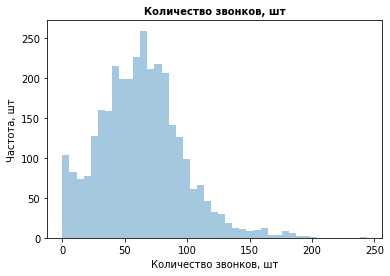

In [5]:
plt.title("Количество звонков, шт", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=df['calls'], kde=False, rug=False, axlabel="Количество звонков, шт")
plt.show()

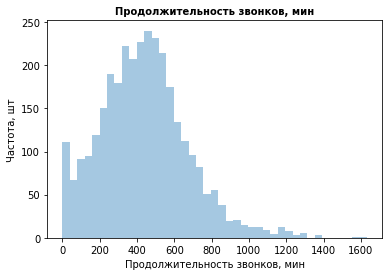

In [6]:
plt.title("Продолжительность звонков, мин", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=df['minutes'], kde=False, rug=False, axlabel="Продолжительность звонков, мин")
plt.show()

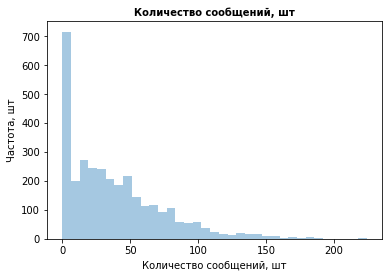

In [7]:
plt.title("Количество сообщений, шт", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=df['messages'], kde=False, rug=False, axlabel="Количество сообщений, шт")
plt.show()

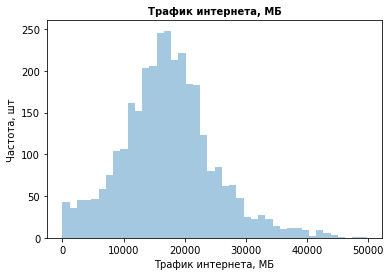

In [8]:
plt.title("Трафик интернета, МБ", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=df['mb_used'], kde=False, rug=False, axlabel="Трафик интернета, МБ")
plt.show()

Распределение данных выглядит нормально. Нет неожиданных пиков и выделяющихся значений.

У данных по сообщениям есть пик в 0, но как мы выяснили в прошлом проекте, сообщения - это самая невостребованная функция, ей многие не пользуются. По второму месту по популярности была услуга звонков - в ней тоже видим небольшой пик в 0, но меньше чем по сообщениям. Это как раз сходится с прошлым анализом популярности.

Самая популярная услуга была - интернет. И как мы видим у нее намного меньше нулевых значений, если сравнивать с другими услугами.

Перейдем к дальнейшим шагам.

## Разбейте данные на выборки

In [9]:
#определим признаки и целевой признак
features = df.drop('is_ultra', axis=1) 
target = df['is_ultra']

Выше мы разделили данные на признаки и целевой признак. Теперь нам необходимо создать выборки с данными:
- тренировочную,
- валидационную,
- тестовую.

Размеры тестовой и валидационной выборки обычно берутся равными. И валидационная выборка обычно состовлят 25% от совокупности тренировочная+валидационная. Если мы возьмем для тренировочной выборки 60%, для валидационной 20% и для тестовой 20%, то как раз эти условия выполнятся (равные выборки по 20% тестовая и валидационная, и 20% от 60%+20% - это как раз 25%).

Чтобы получить финальную разбивку на 3 выборки нужно сначала поделить совокупность на 80% и 20%. А потом получившиеся 80% поделить на 75% и 25%.

In [10]:
#первое деление на тестовую выборку и оставшие данные
features_temp, features_test, target_temp, target_test = train_test_split(
    features, target, test_size=0.20, random_state=12345)

Посмотрим на параметра тестовой выборки, которую мы отделили.

In [11]:
features_test.shape, target_test.shape

((643, 4), (643,))

Запомним и сравним с другими выборками.

In [12]:
#второе деление на тренировочную и валидационную выборки
features_train, features_valid, target_train, target_valid = train_test_split(
    features_temp, target_temp, test_size=0.25, random_state=12345) 

Посмотрим что у нас получилось.

In [13]:
features_train.shape, target_train.shape

((1928, 4), (1928,))

In [14]:
features_valid.shape, target_valid.shape

((643, 4), (643,))

Отлично, размеры валидационной выборки и тестовой равны. А тренировочная больше в 3 раза. (Уточнение: почти в 3 раза, из-за того, что изначальное число строк не делится на 5, именно на такое количество частей мы разбиваем 3+1+1, то существуют небольшое отклонение.)

## Исследуйте модели

Задача, которую нам необходимо выполнить - это задача классификации. Для задач такого типа можно использовать такие модели как:
- решающее дерево;
- случайный лес;
- логистическая регрессия.

Посмотрим на данные модели и как они справляются с нашей валидационной выборкой. Гипермараметры, которые будем рассматривать: глубину деревьев переберем от 1 до 10, а для модели случайного леса проверим количество деревьев от 1 до 10.

In [15]:
#модель решающее дерево
best_model_decision_tree = None
best_result_decision_tree = 0
best_depth_decision_tree = 0

for depth in range(1,11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train,target_train)
    predictions_valid = model.predict(features_valid)
    result = accuracy_score(target_valid, predictions_valid)
    if result > best_result_decision_tree:
        best_model_decision_tree = model
        best_result_decision_tree = result
        best_depth_decision_tree = depth

In [16]:
best_result_decision_tree, best_depth_decision_tree

(0.7744945567651633, 7)

In [17]:
predictions_train = best_model_decision_tree.predict(features_train)
accuracy_score(target_train, predictions_train)

0.8506224066390041

Отлично, мы уже нашли одну модель, которая на валидационной выборке показала результат accuracy больше 0,75 - целых 0,77. Глубина дерева при этом оказалась равна 7. Но на обучающей выборке модель показыват значительно лучшую метрику качества accuracy - 0,85 значит есть проблема переобучения (разница 8). Проверим другие типы моделей и сравним все показатели.

In [18]:
#модель случайный лес
best_model_random_forest = None
best_result_random_forest = 0
best_depth_random_forest = 0
best_est_random_forest = 0

for est in range(1, 21):
    for depth in range(1,11):
        model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est)
        model.fit(features_train, target_train) 
        result = model.score(features_valid, target_valid)
        if result > best_result_random_forest:
            best_model_random_forest = model
            best_result_random_forest = result
            best_depth_random_forest = depth
            best_est_random_forest = est

In [19]:
best_result_random_forest, best_depth_random_forest, best_est_random_forest

(0.7962674961119751, 9, 3)

При работе модели случайного леса accuracy еще чуть выше! Всего 3 дерева, с глубиной 9. Accuracy при этом больше 0,79. А что будет если посмотреть с большим количеством деревьев? Проверим, но чтобы не перребирать огромное число вариантов, сделаем шаг в 10 деревьев.

In [20]:
#модель случайный лес 2
best_model_random_forest_2 = None
best_result_random_forest_2 = 0
best_depth_random_forest_2 = 0
best_est_random_forest_2 = 0

for est in range(10, 51, 10):
    for depth in range(1,11):
        model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est)
        model.fit(features_train, target_train) 
        result = model.score(features_valid, target_valid)
        if result > best_result_random_forest_2:
            best_model_random_forest_2 = model
            best_result_random_forest_2 = result
            best_depth_random_forest_2 = depth
            best_est_random_forest_2 = est

In [21]:
best_result_random_forest_2, best_depth_random_forest_2, best_est_random_forest_2

(0.7978227060653188, 10, 50)

Accuracy выросла незначительно, зато и глубина и количество деревьев выросло значительно. Это сильно повышает скорость работы модели. Посмотрим на то, не переобучились ли наши модели.

In [22]:
predictions_train = best_model_random_forest.predict(features_train)
accuracy_score(target_train, predictions_train)

0.8651452282157677

In [23]:
predictions_train = best_model_random_forest_2.predict(features_train)
accuracy_score(target_train, predictions_train)

0.8947095435684648

Хоть вторая модель и более точная, видно, что проблема переобучения у нее больше (разница почти 10 в accuracy), чем у первой модели случайного леса (разница около 7). Пока явно выигрывает модель best_model_random_forest. Так как несмотря на незначительно большую accuracy, скорость работы и проблема переобучения у нее значительно выше.

Проверим последний тип модели - Логистическую регрессию.

In [24]:
#модель логистическая регрессия
model_logistic_regression = LogisticRegression(random_state=12345)
model_logistic_regression.fit(features_train, target_train)
result_logistic_regression = model_logistic_regression.score(features_valid, target_valid) 

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
result_logistic_regression

0.6967340590979783

У модели логистической регресии accuracy значительно хуже, чем у решающего дерева и случайного леса. Accuracy даже меньше 0,75. К сожалению, на этой модели мы не станем останавливаться, так как она не выполняем даже необходимого условия нашей задачи.

## Проверьте модель на тестовой выборке

Проверим на тестовой выборке все три модели, которые рассматривали выше.

In [26]:
#тест модели решающего дерева
predictions_test = best_model_decision_tree.predict(features_test)
accuracy_score(target_test, predictions_test)

0.7884914463452566

In [27]:
#тест модели рандомного леса
predictions_test = best_model_random_forest.predict(features_test)
accuracy_score(target_test, predictions_test)

0.7931570762052877

In [28]:
#тест модели рандомного леса 2
predictions_test = best_model_random_forest_2.predict(features_test)
accuracy_score(target_test, predictions_test)

0.7993779160186625

Все модели показали хорошие результаты. Несмотря на то, что лучший результат у модели случайного леса №2, при выборе модели для внедрения на производстве я буду рекомендовать модель случайного дерева номер 1. Так как ее показатели близки к модели №2, но она работает быстрее и проблема переобучения у нее меньше.

## (бонус) Проверьте модели на адекватность

Сравним модели со случайной. Для нашей задачи классификации случайная модель - это та, которая случайно, с вероятностью 0,5 угадывает 1 или 0 будет искомое значение. Accuracy для такой модель будет считаться как: 

- Accuracy = Количество угаданных объектов / Количество объектов = (Количество угаданных 1 + Количество угаданных 0) / Количество объектов.

Пусть всего объектов будет K, количество 1 = L, тогда количество 0 = K - L. Тогда "количество угаданных 1" для случайной модели будет 0,5L, а "количество угаданных 0" 0,5(K - L)

- Accuracy = (0,5L + 0,5(K - L)) / K = 0,5((L+K-L)/K) = 0,5.

Все три модели, которые мы тестировали имееют большую accuracy, поэтому они прошли проверку на адекватность.

## Общий вывод

В данном проекте решалась задача классификации: выбор тарифа Смарт или Ультра для клиентов мобильного оператора.

Признаки, по которым строилась модель - это столбцы количество звонков, количество минут, количество сообщений, трафик интернета. А целевой признак, который предсказывался - столбец с 1 и 0, где 1 - это тариф Ультра, а 0 - тариф Смарт.

Данные были разделены на следующие выборки:
- тренировочную, 60% и 1928 строк;
- валидационную, 20% и 643 строки;
- тестовую, 20% и 643 строки.

Типы моделей и гиперпараметры, которые были рассмотрены:
- решающее дерево (с макс. глубиной от 1 до 10);
- случайный лес (с количестсвом деревьев от 1 до 20);
- случайный лес № 2 (с количестсвом деревьев от 10 до 50 с шагом в 10);
- логистическая регрессия.

Необходимое условие для задачи accuracy = 0,75 достигли все модели кроме логистической регрессии. Поэтому дальнейшее тестирование было продолжено только с моделями решающего дерева и случайного леса.

- решающее дерево, лучший результат: глубина 7, accuracy = 0,77;
- случайный лес, лучший результат: количество деревьев 3, глубина 9, accuracy = 0,796;
- случайный лес № 2, лучший результат: количество деревьев 50, глубина 10 , accuracy = 0,797;
- логистическая регрессия, accuracy = 0,69.

По оставшимся трем моделям их результат на тренировочной выборке был:
- решающее дерево - 0,85, разница с валидационной около 8;
- случайный лес - 0,86, разница с валидационной около 7;
- случайный лес № 2 - 0,89, разница с валидационной около 10.

А на тестовой выборке результат был:
- решающее дерево - 0,788;
- случайный лес - 0,793;
- случайный лес № 2 - 0,799.

Все три модели имеют accuracy больше 0,5, которую показала бы случайная модель, поэтому они прошли проверку на адекватность.

Итого, все три модели выполнили необходимое условие задачи: имеют accuracy больше 0,75. Но для внедрения на продуктиве рекомендуется:
- случайный лес, количество деревьев 3, глубина 9.

У данной модели незначительное отставание от второй модели случайного леса по accuracy. Но при этом она меньше переобучена, а также имеет значительно меньшее число деревьев, и с меньшей глубиной, поэтому будет работать намного быстрее на большом количестве данных.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
